In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('train.csv')
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
X = data.iloc[:,1:]
y = data.iloc[:,0]
target_names = y.unique()
print(target_names)

s = StandardScaler()
X_std = s.fit_transform(X)

[1 0 4 7 3 5 8 9 2 6]


In [ ]:
#zastupljenost klasa

In [ ]:
pca = PCA(n_components=2)
pca.fit(X_std)
X_pca = pca.transform(X_std)

lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(X_std, y)
X_lda = lda.transform(X_std)

In [ ]:
plt.figure(figsize=(16,9))

for i in target_names:
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], alpha=.5, label=i)
plt.legend()
plt.title('PCA of MNIST dataset')

In [ ]:
plt.figure(figsize=(16,9))

for i in target_names:
    plt.scatter(X_lda[y == i, 0], X_lda[y == i, 1], alpha=.5, label=i)
plt.legend()
plt.title('LDA of MNIST dataset')

In [4]:
# Podela podataka na skup za obuku i skup za testiranje
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, stratify=y, random_state=42)

In [5]:
#standardizacija
s = StandardScaler()
s.fit(X_train)
X_train_std = s.transform(X_train)
X_test_std = s.transform(X_test)

In [18]:
# klasifikacija bez redukcije dimenzionanosti

import time
start = time.time()

knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train_std, y_train)
y_pred1 = knn1.predict(X_test_std)
c1 = confusion_matrix(y_test, y_pred1)
print(c1)
print("udeo ispravno pogodjenih org: ", np.trace(c1)/sum(sum(c1)))

end = time.time()
print('vreme trajanja je: ', end - start, ' sekundi.')

[[2821    1   10    2    2   11   31    2   12    0]
 [   0 3245    8    4    5    1    8    1    5    2]
 [  35   46 2603   83   31   10   29   49   24   14]
 [   7   10   51 2744    3  104    3   46   56   22]
 [   8   30   31    9 2566   14   15   24   12  141]
 [  20    5   13  101    8 2339   68    5   68   29]
 [  35    6   10    1   10   31 2793    0   10    0]
 [   4   38   23   13   26    1    0 2797    2  177]
 [  30   45   27   71   26  149   16   10 2423   47]
 [  13   11   14   20  100   16    0  157   15 2586]]
udeo ispravno pogodjenih org:  0.9155442176870748
vreme trajanja je:  388.08554315567017  sekundi.


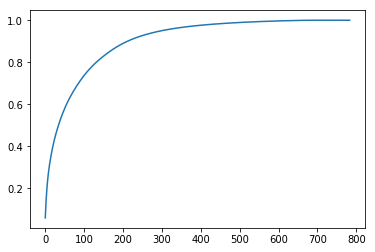

In [19]:
#zavisnost objašnjene varijanse od broja PCA komponenti
pca = PCA(n_components=None)
pca.fit(X_train_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [20]:
# SA PCA
pca = PCA(n_components=0.9)
pca.fit(X_train_std)
X_train_r = pca.transform(X_train_std)
X_test_r = pca.transform(X_test_std)
print('Redukovani prostor ima dimenziju: ', pca.n_components_)

import time
start = time.time()

knn2 = KNeighborsClassifier(n_neighbors=1)
knn2.fit(X_train_r, y_train)
y_pred2 = knn2.predict(X_test_r)
c2 = confusion_matrix(y_test, y_pred2)
print(c2)
print("udeo ispravno pogodjenih pca: ", np.trace(c2)/sum(sum(c2)))

end = time.time()
print('vreme trajanja je: ', end - start, ' sekundi.')

Redukovani prostor ima dimenziju:  213
[[2831    2   11    2    1   11   24    1    9    0]
 [   0 3246    8    3    4    1    7    2    6    2]
 [  25   30 2662   62   26    7   29   43   30   10]
 [   6   13   53 2730    4  104    4   38   68   26]
 [   6   15   29    7 2621    9   13   19   14  117]
 [  19    5    9   83    5 2382   68    5   55   25]
 [  27    5   11    1    7   28 2806    0   11    0]
 [   3   29   26   12   26    2    0 2828    5  150]
 [  21   38   22   51   28  120   12    6 2508   38]
 [  11    8   11   19   99   16    0  117   17 2634]]
udeo ispravno pogodjenih pca:  0.9268027210884354
vreme trajanja je:  125.03963112831116  sekundi.


In [15]:
# SA LDA
lda = LinearDiscriminantAnalysis(n_components=9)
lda.fit(X_train_std, y_train)
X_train_r = lda.transform(X_train_std)
X_test_r = lda.transform(X_test_std)

knn3 = KNeighborsClassifier(n_neighbors=1)
knn3.fit(X_train_r, y_train)
y_pred3 = knn3.predict(X_test_r)
c3 = confusion_matrix(y_test, y_pred3)
print(c3)
print("udeo ispravno pogodjenih lda: ", np.trace(c3)/sum(sum(c2)))

[[2764    2   16    4    5   39   38    3   13    8]
 [   2 3150   20   13    9    4    9   12   52    8]
 [  31   37 2460   91   45   35   55   68   78   24]
 [  16   19  123 2500    9  145   10   45  125   54]
 [   7   15   26    3 2536   25   33   14   27  164]
 [  37   30   26  149   13 2138   68   18  143   34]
 [  35    5   47    3   18   66 2678    2   33    9]
 [   8   31   39   36   50   24    2 2723   18  150]
 [  29  117   64  115   49  152   30    7 2223   58]
 [  21    5   16   28  182   38    4  113   41 2484]]
udeo ispravno pogodjenih lda:  0.8726530612244898
